## Fashion MNIST

In [45]:
from keras.datasets import fashion_mnist
import numpy as np
import seaborn as ssn
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import time
import statistics

In [2]:
# Load Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape : ', x_train.shape, '  y_train shape: ', y_train.shape)
print('x_test shape : ', x_test.shape, '  y_test shape: ', y_test.shape)

x_train shape :  (60000, 28, 28)   y_train shape:  (60000,)
x_test shape :  (10000, 28, 28)   y_test shape:  (10000,)


In [3]:
# Check for null and uniques values
print('null values in x_train: ', np.isnan(x_train).any())
print('null values in y_train: ', np.isnan(y_train).any())
print('null values in x_test: ', np.isnan(x_test).any())
print('null values in y_test: ', np.isnan(y_test).any())
print('Uniques values in y_train: ', np.unique(y_train))
print('Uniques values in y_test: ', np.unique(y_test))

null values in x_train:  False
null values in y_train:  False
null values in x_test:  False
null values in y_test:  False
Uniques values in y_train:  [0 1 2 3 4 5 6 7 8 9]
Uniques values in y_test:  [0 1 2 3 4 5 6 7 8 9]


Countplot for y_train


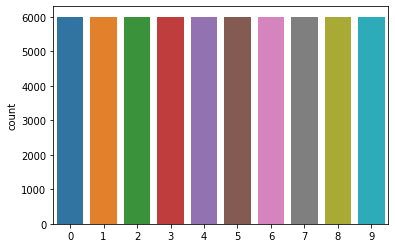

In [4]:
# Countplot for y_train
print('Countplot for y_train')
ssn.countplot(y_train);

Countplot for y_train


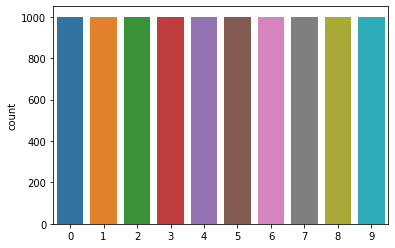

In [5]:
# Countplot for y_train
print('Countplot for y_train')
ssn.countplot(y_test);

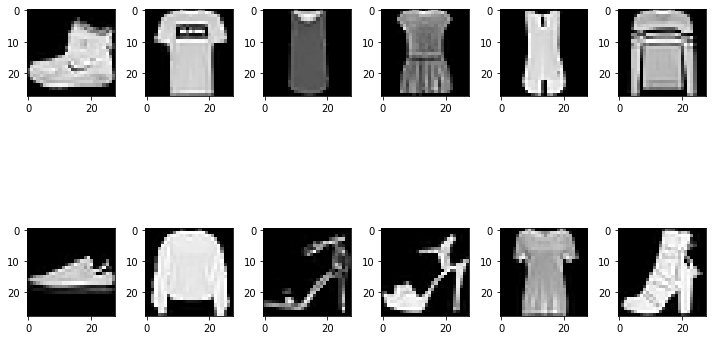

In [6]:
#Generating 12 images from the given dataset.
# Plot to see images
g, ax = plt.subplots(2, 6)
g.set_size_inches(10, 10)
k=0

for i in range(2):
    for j in range(6):
        ax[i,j].imshow(x_train[k], cmap='gray')
        k+=1
    plt.tight_layout()


In [7]:
def preprocess (x_train, x_test, y_train, y_test):
    # reshape
    x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
    x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
    # one hot encoding
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    # Normalize the data
    # dividing rgb values by 255 for 0-1 representation
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train = x_train/255
    x_test = x_test/255
    return x_train, x_test, y_train, y_test

In [31]:
# Model
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='elu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='elu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [38]:
# Use kfold to evaluate the model
def evaluate(x_train, y_train, n_folds=3):
    acc_list = []
    history_list = []
    kfold = KFold(n_folds, shuffle=True, random_state=20)
    for i, j in kfold.split(x_train):
        model = build_model()
        train_x, train_y, test_x, test_y = x_train[i], y_train[i], x_train[j], y_train[j]
        history = model.fit(train_x, train_y, validation_data=(test_x, test_y), batch_size=32, epochs=20)
        _, accuracy = model.evaluate(test_x, test_y)
        print('accuracy: ', accuracy*100)
        acc_list.append(accuracy)
        history_list.append(history)
    return acc_list, history_list

In [39]:
def run(x_train, y_train, x_test, y_test):
    x_tr, x_te, y_tr, y_te = preprocess(x_train, x_test, y_train, y_test)
    print('x_train shape : ', x_tr.shape, '  y_train shape: ', y_tr.shape)
    print('x_test shape : ', x_te.shape, '  y_test shape: ', y_te.shape)
    start_time=time.time()
    acc_list, history_list = evaluate(x_tr, y_tr)
    end_time=time.time()
    min_time=(end_time-start_time)//60
    second_time= (end_time-start_time)%60
    print("The time taken to run the model is {} min {} s".format(min_time,second_time))


    return acc_list, history_list
    

In [40]:
acc_list , history_list = run(x_train, y_train, x_test, y_test)

x_train shape :  (60000, 28, 28, 1)   y_train shape:  (60000, 10)
x_test shape :  (10000, 28, 28, 1)   y_test shape:  (10000, 10)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0

40000/40000 [==============================] - 46s 1ms/step - loss: 0.0546 - accuracy: 0.9791 - val_loss: 0.4416 - val_accuracy: 0.9006
Epoch 14/20
40000/40000 [==============================] - 48s 1ms/step - loss: 0.0534 - accuracy: 0.9807 - val_loss: 0.5832 - val_accuracy: 0.8790
Epoch 15/20
40000/40000 [==============================] - 47s 1ms/step - loss: 0.0489 - accuracy: 0.9830 - val_loss: 0.5585 - val_accuracy: 0.9014
Epoch 16/20
40000/40000 [==============================] - 49s 1ms/step - loss: 0.0380 - accuracy: 0.9861 - val_loss: 0.6336 - val_accuracy: 0.8892
Epoch 17/20
40000/40000 [==============================] - 47s 1ms/step - loss: 0.0426 - accuracy: 0.9843 - val_loss: 0.6081 - val_accuracy: 0.8982
Epoch 18/20
40000/40000 [==============================] - 51s 1ms/step - loss: 0.0369 - accuracy: 0.9871 - val_loss: 0.5627 - val_accuracy: 0.9049
Epoch 19/20
40000/40000 [==============================] - 53s 1ms/step - loss: 0.0324 - accuracy: 0.9880 - val_loss: 0.6291

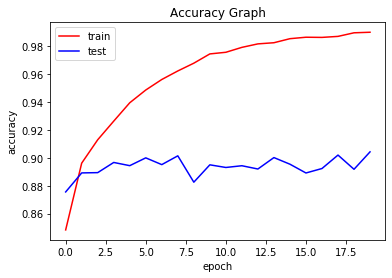

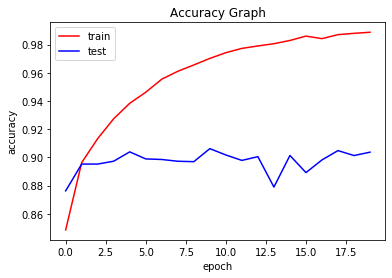

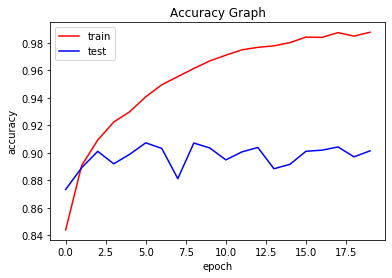

In [41]:
# Accuracy Graph
for i in range(len(history_list)):
    plt.title('Accuracy Graph')
    plt.plot(history_list[i].history['accuracy'], label='train', color='red' )
    plt.plot(history_list[i].history['val_accuracy'], label='test', color='blue')
    plt.legend(['train', 'test'], loc='upper left')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()

In [46]:
print('accuracy: ',statistics.mean(acc_list))

accuracy:  0.903166671593984


In [21]:
x_tr, x_te, y_tr, y_te = preprocess(x_train, x_test, y_train, y_test)

In [22]:
# Use data augmentation to prevent overfitting.

dgen= ImageDataGenerator(featurewise_center=False,
                        samplewise_center=False,
                        featurewise_std_normalization=False,
                        samplewise_std_normalization=False,
                        zca_whitening=False,
                        rotation_range=10,
                        zoom_range=0.1,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False)
dgen.fit(x_tr)

In [33]:
model = build_model()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)             

In [34]:
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)
callback=keras.callbacks.EarlyStopping(monitor='loss',patience=3)

history =model.fit(dgen.flow(x_tr,y_tr,batch_size=50),epochs=20,
                    validation_data=(x_te,y_te),callbacks=[lr_reduction,callback])

Epoch 1/20
1200/1200 [==============================] - 58s 48ms/step - loss: 0.5859 - accuracy: 0.7847 - val_loss: 0.4096 - val_accuracy: 0.8501
Epoch 2/20
1200/1200 [==============================] - 75s 62ms/step - loss: 0.4406 - accuracy: 0.8351 - val_loss: 0.3778 - val_accuracy: 0.8663
Epoch 3/20
1200/1200 [==============================] - 78s 65ms/step - loss: 0.3934 - accuracy: 0.8530 - val_loss: 0.3412 - val_accuracy: 0.8784
Epoch 4/20
1200/1200 [==============================] - 75s 62ms/step - loss: 0.3669 - accuracy: 0.8630 - val_loss: 0.3504 - val_accuracy: 0.8698
Epoch 5/20
1200/1200 [==============================] - 70s 58ms/step - loss: 0.3488 - accuracy: 0.8704 - val_loss: 0.3418 - val_accuracy: 0.8756

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/20
1200/1200 [==============================] - 75s 62ms/step - loss: 0.3158 - accuracy: 0.8814 - val_loss: 0.3052 - val_accuracy: 0.8893
Epoch 7/20
1200/1200 [=====================

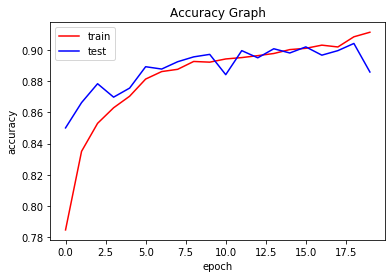

In [35]:
# Plot Accuracy
plt.title('Accuracy Graph')
plt.plot(history.history['accuracy'], label='train', color='red' )
plt.plot(history.history['val_accuracy'], label='test', color='blue')
plt.legend(['train', 'test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [51]:
print('Accuracy on training set: ',max(history.history['accuracy']))
print('Accuracy on test set: ',max(history.history['val_accuracy']))

Accuracy on training set:  0.91138333
Accuracy on test set:  0.90420001745224


## End